# Step 1.Reading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive')


In [ ]:
from data_resampling import process_data

# Example usage
data_path = '/content/drive/My Drive/eDO_data_M1.csv'
resampled_data = process_data(data_path)
resampled_data.head()


/content/drive/My Drive/data_resampling.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_data = data.resample('1H').agg({


,open,high,low,close,volume,future_close,pct_change,Target,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7,close_lag_8,close_lag_9,close_lag_10,MA_3
TimeStamp,,,,,,,,,,,,,,,,,,,
2022-01-01 10:00:00,47143.98,47298.75,46715.39,46871.08,923.01760,47391.82,1.111005,C,47143.98,47124.82,47194.73,46979.62,47192.55,46711.05,46813.20,46811.77,46778.14,46656.13,47046.626667
2022-01-01 11:00:00,46871.09,47007.73,46756.77,46758.87,732.88793,47319.67,1.199345,C,46871.08,47143.98,47124.82,47194.73,46979.62,47192.55,46711.05,46813.20,46811.77,46778.14,46924.643333
2022-01-01 12:00:00,46758.87,47150.48,46756.30,47074.05,582.15009,47440.74,0.778964,C,46758.87,46871.08,47143.98,47124.82,47194.73,46979.62,47192.55,46711.05,46813.20,46811.77,46901.333333
2022-01-01 13:00:00,47074.05,47199.67,46935.09,47023.24,454.14412,47722.65,1.487371,C,47074.05,46758.87,46871.08,47143.98,47124.82,47194.73,46979.62,47192.55,46711.05,46813.20,46952.053333
2022-01-01 14:00:00,47023.24,47100.00,46850.18,46926.22,503.66220,47625.30,1.489743,C,47023.24,47074.05,46758.87,46871.08,47143.98,47124.82,47194.73,46979.62,47192.55,46711.05,47007.836667


# Step 2:  XGBoost,

Data index range: 2022-01-01 10:00:00 to 2024-12-08 21:00:00
Train data shape: (24756, 19)
Test data shape: (910, 19)
X_train shape: (24756, 18), y_train shape: (24756,)
X_test shape: (910, 18), y_test shape: (910,)
Root Mean Squared Error (RMSE): 0.0673
R^2 Score: 0.9832


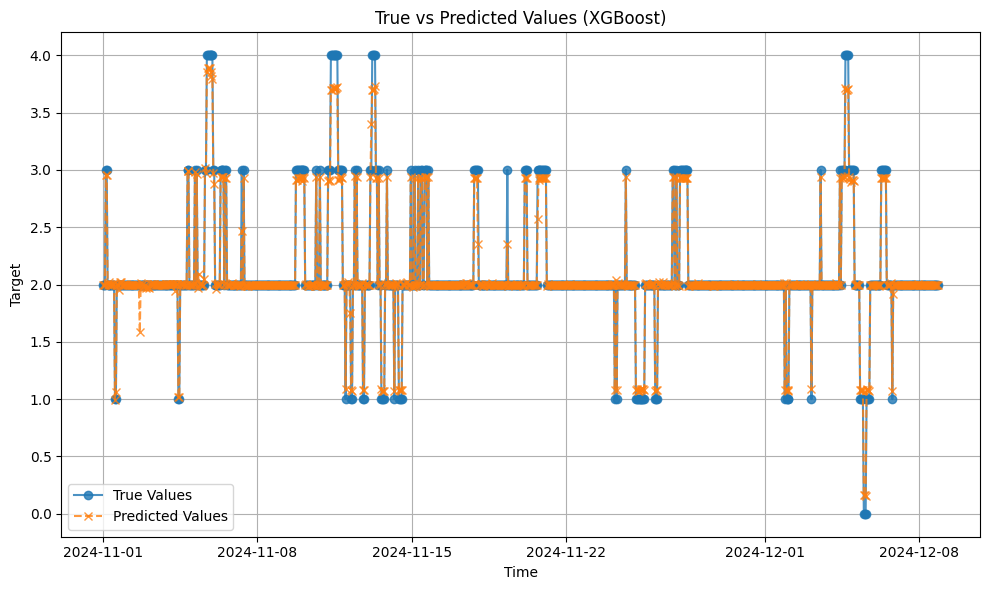

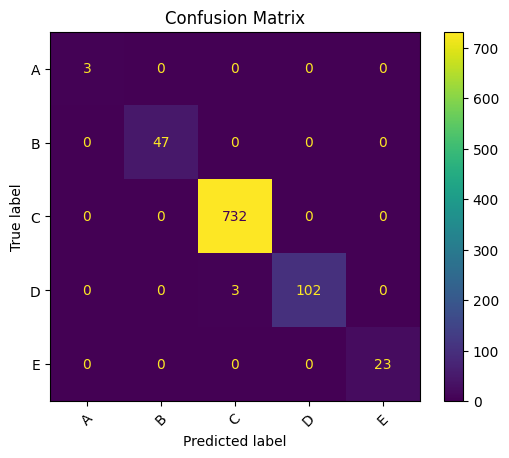

{'rmse': 0.06732571643085349, 'r2': 0.9831946492195129, 'confusion_matrix': array([[  3,   0,   0,   0,   0],
       [  0,  47,   0,   0,   0],
       [  0,   0, 732,   0,   0],
       [  0,   0,   3, 102,   0],
       [  0,   0,   0,   0,  23]])}


In [ ]:
# Best Model (XGBoost)
from best_model import process_and_train_xgb

# Example usage with your resampled_data DataFrame
result = process_and_train_xgb(resampled_data)

# Print the results
print(result)

## Step2.1: Feature Selection


Current VIF Values:
        Variable           VIF
7    close_lag_1  1.429289e+08
17          MA_3  5.186019e+07
0           open  4.921439e+07
8    close_lag_2  5.811168e+06
3          close  5.482591e+06
1           high  2.640879e+04
2            low  2.113409e+04
10   close_lag_4  1.038174e+04
9    close_lag_3  1.037494e+04
11   close_lag_5  1.037321e+04
15   close_lag_9  1.036948e+04
13   close_lag_7  1.036923e+04
14   close_lag_8  1.036812e+04
12   close_lag_6  1.036797e+04
16  close_lag_10  5.270992e+03
5   future_close  3.335906e+03
6     pct_change  6.191400e+00
4         volume  1.446207e+00
Data index range: 2022-01-01 10:00:00 to 2024-12-08 21:00:00
Train data shape: (24756, 19)
Test data shape: (910, 19)
X_train shape: (24756, 18), y_train shape: (24756,)
X_test shape: (910, 18), y_test shape: (910,)
Root Mean Squared Error (RMSE): 0.0673
R^2 Score: 0.9832


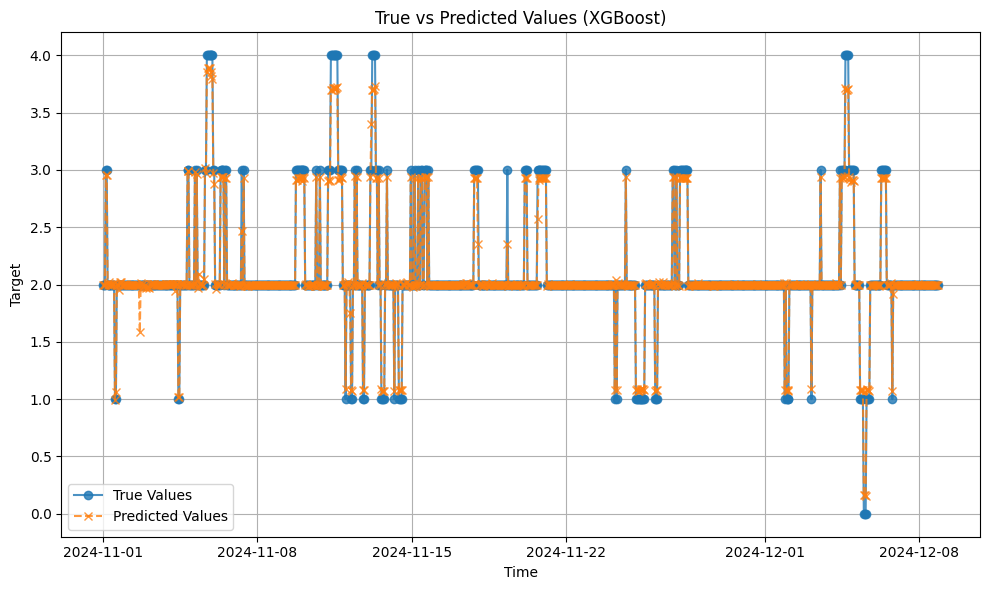

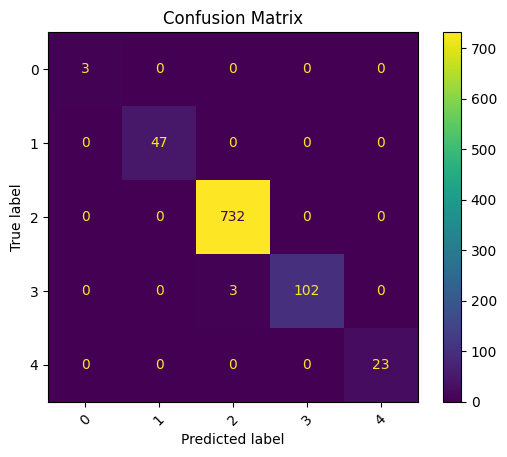

Current RMSE: 0.0673, Current R^2: 0.9832
Removing feature with highest VIF: close_lag_1

Current VIF Values:
        Variable           VIF
16          MA_3  4.906676e+07
0           open  5.572122e+06
7    close_lag_2  5.500856e+06
3          close  5.188826e+06
1           high  7.241640e+04
2            low  5.852672e+04
9    close_lag_4  2.856022e+04
8    close_lag_3  2.854826e+04
10   close_lag_5  2.854000e+04
14   close_lag_9  2.853961e+04
12   close_lag_7  2.853671e+04
13   close_lag_8  2.853461e+04
11   close_lag_6  2.853230e+04
15  close_lag_10  1.450768e+04
5   future_close  8.866149e+03
6     pct_change  3.109281e+02
4         volume  2.145066e+00
Data index range: 2022-01-01 10:00:00 to 2024-12-08 21:00:00
Train data shape: (24756, 18)
Test data shape: (910, 18)
X_train shape: (24756, 17), y_train shape: (24756,)
X_test shape: (910, 17), y_test shape: (910,)


/content/drive/My Drive/best_model.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resampled_data['Target'] = label_encoder.fit_transform(resampled_data['Target'])


Root Mean Squared Error (RMSE): 0.0722
R^2 Score: 0.9807


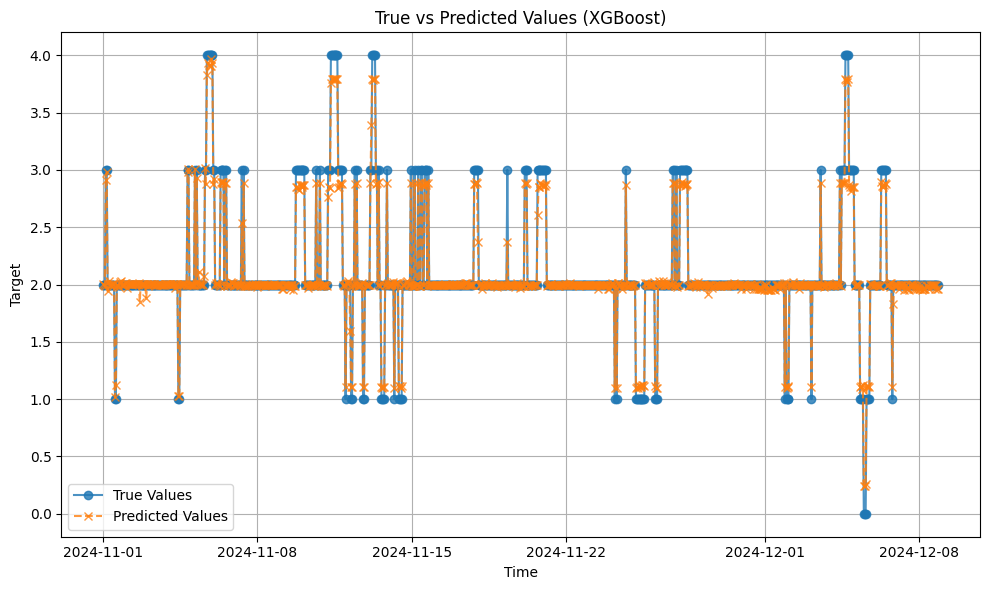

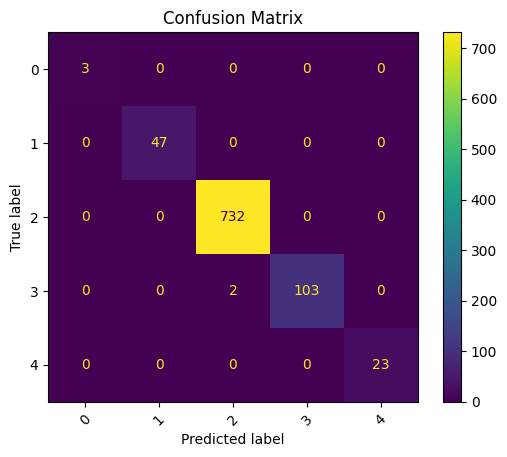

Current RMSE: 0.0722, Current R^2: 0.9807
No further improvement. Stopping feature elimination.

Best Model Performance:
Best RMSE: 0.0673
Best R^2: 0.9832

Final Selected Features:
['open', 'high', 'low', 'close', 'volume', 'future_close', 'pct_change', 'close_lag_2', 'close_lag_3', 'close_lag_4', 'close_lag_5', 'close_lag_6', 'close_lag_7', 'close_lag_8', 'close_lag_9', 'close_lag_10', 'MA_3']
Final RMSE: 0.0673
Final R^2: 0.9832


In [ ]:
# Selecting best Features
from feature_selection import feature_selection_vif



result = feature_selection_vif(
                               data=resampled_data,
                               target_column='Target',
                      model_function=process_and_train_xgb,
    date_split='2024-11-01'
)

print("\nFinal Selected Features:")
print(result["best_features"])
print(f"Final RMSE: {result['best_rmse']:.4f}")
print(f"Final R^2: {result['best_r2']:.4f}")